# **Sentiment Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sentiment_analysis_data.csv')

In [ ]:
data.shape

(5842, 2)

In [ ]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
X = data.Sentence
y = data.Sentiment

In [ ]:
y.nunique(), y.unique()

(3, array(['positive', 'negative', 'neutral'], dtype=object))

In [ ]:
data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

#### **Distribution of data**

In [ ]:
y.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

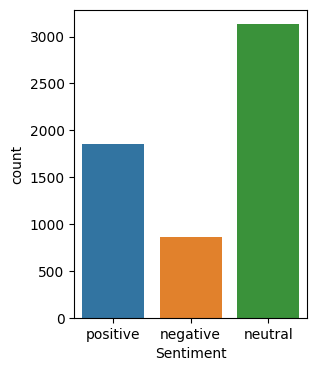

In [ ]:
plt.figure(figsize = (3,4))
sns.countplot(x = data.Sentiment, data=data);

#### **WordCloud**

In [ ]:
positive = data['Sentence'][data['Sentiment'] == 'positive']
neutral = data['Sentence'][data['Sentiment'] == 'neutral']
negative = data['Sentence'][data['Sentiment'] == 'negative']

In [ ]:
from wordcloud import WordCloud

pos = WordCloud().generate(str(positive))
neg = WordCloud().generate(str(negative))
neut = WordCloud().generate(str(neutral))

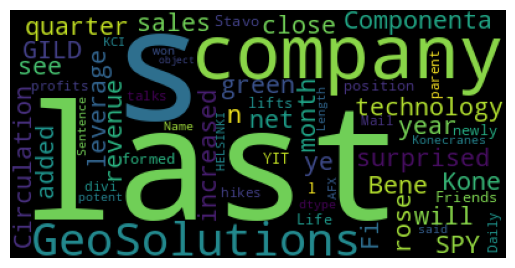

In [ ]:
plt.imshow(pos)
plt.axis('off');

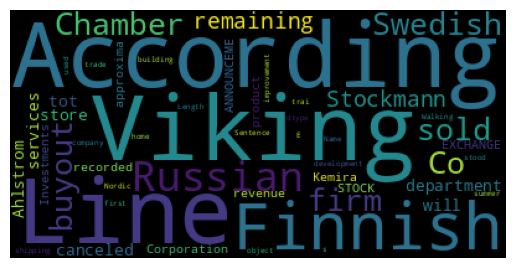

In [ ]:
plt.imshow(neut)
plt.axis('off');

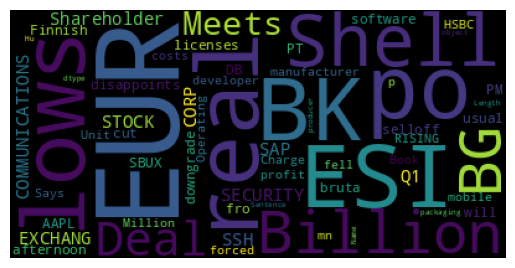

In [ ]:
plt.imshow(neg)
plt.axis('off');

#### **Vectorization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
cv = CountVectorizer(stop_words = 'english')

In [ ]:
type(data.Sentence)

pandas.core.series.Series

In [ ]:
X = cv.fit_transform(X)

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(5842, 11126)

In [ ]:
cv.vocabulary_['netflix']

6882

#### **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [ ]:
y_test.value_counts()

neutral     771
positive    472
negative    218
Name: Sentiment, dtype: int64

#### **Model training**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
mnb.score(X_train, y_train)

0.8557406984706688

In [ ]:
mnb.score(X_test, y_test)

0.6878850102669405

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

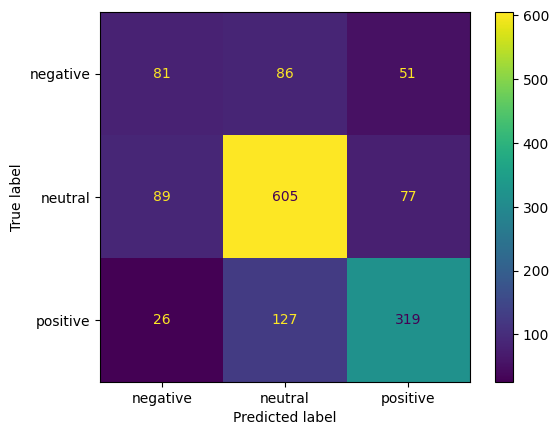

In [ ]:
ConfusionMatrixDisplay.from_estimator(mnb, X_test, y_test);

In [ ]:
sample = 'The compnay XYZ did not perform well in the first quarter. Its sales have been declining.'
sample = cv.transform([sample])

mnb.predict(sample)

array(['neutral'], dtype='<U8')

In [ ]:
sample = 'The growth rate of the company has been positive. Its shares price is also increasing. Customers like the companys policies'
sample = cv.transform([sample])

mnb.predict(sample)

array(['positive'], dtype='<U8')